In [3]:
import os
path = '/content/drive/My Drive/cis520/project'
os.chdir(path)
os.listdir(path)

['cis520 proposal .gdoc', 'data.csv', 'imgs', 'breast cancer.ipynb']

### Load Breast Cancer Dataset

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data.csv')
print(df.shape)
df.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Data Visualization 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


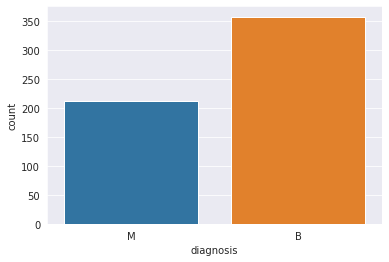

In [6]:
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

sns.countplot('diagnosis', data=df)

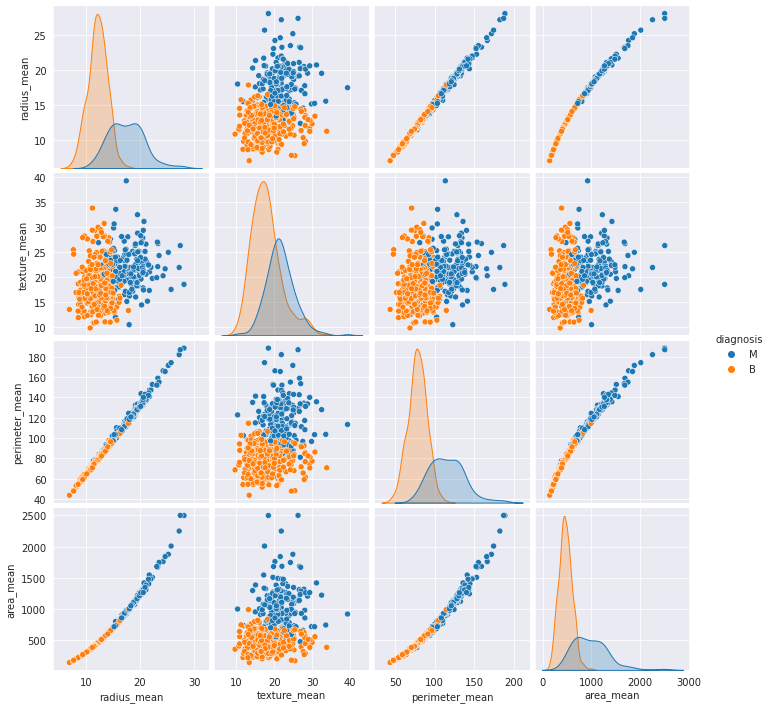

In [7]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
p = sns.pairplot(df[cols], hue="diagnosis", diag_kind = 'kde')
p.savefig("./imgs/vis.png")

### Label Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
df['diagnosis'] = le_y.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


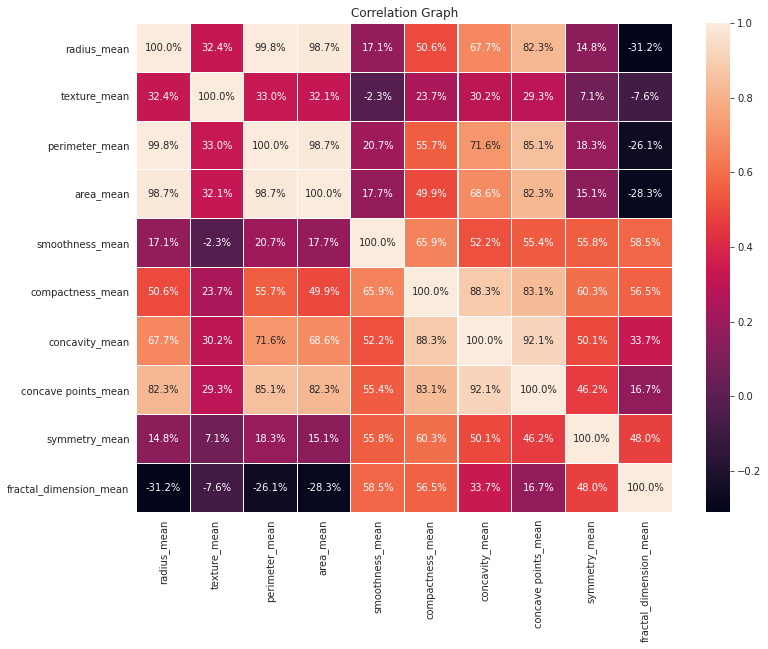

In [9]:
plt.figure(figsize=(12, 9))
plt.title("Correlation Graph")
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
corr = df[cols].corr()
p = sns.heatmap(corr, annot=True, fmt='.1%',  linewidths=.05)
figure = p.get_figure()  
figure.savefig('./imgs/corr.png', dpi=400)

### T-SNE 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


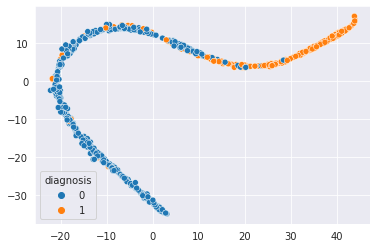

In [11]:
from sklearn.manifold import TSNE
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
       
xs, ys = zip(*TSNE().fit_transform(df[cols].values))
sns.scatterplot(xs, ys, hue=df['diagnosis'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


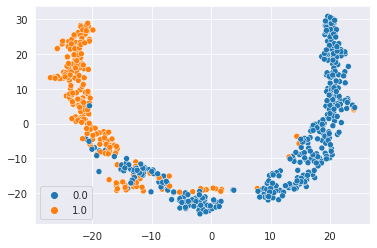

In [12]:
xs, ys = zip(*TSNE().fit_transform(df.values[:,2:32]))
p = sns.scatterplot(xs, ys, hue=df.values[:, 1])

figure = p.get_figure()  
figure.savefig('./imgs/tsne1.png', dpi=400)

### Import sklearn library

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

In [12]:
df = df.drop(columns=['Unnamed: 32']) # drop last column

In [15]:
X = df.values[:,2:]
y = df.values[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


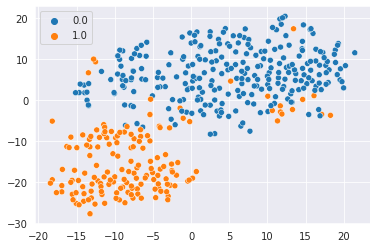

In [17]:
xs, ys = zip(*TSNE().fit_transform(X_train))
p = sns.scatterplot(xs, ys, hue=y_train)

figure = p.get_figure()  
figure.savefig('./imgs/tsne2.png', dpi=400)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


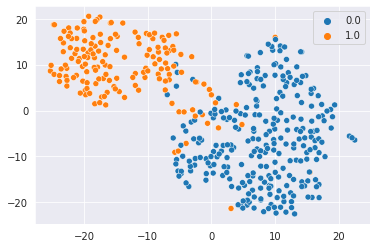

In [33]:
## t-SNE after applying PCA
pca = PCA(n_components=5)

X_train_pca = pca.fit_transform(X_train)

xs, ys = zip(*TSNE().fit_transform(X_train_pca))
p = sns.scatterplot(xs, ys, hue=y_train)

figure = p.get_figure()  
figure.savefig('./imgs/tsne3.png', dpi=400)

### Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
score = lr.score(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        91
         1.0       0.91      0.96      0.93        52

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Decision Tree

In [19]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=10)
dt.fit(X_train, y_train)
score = dt.score(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        91
         1.0       0.84      0.94      0.89        52

    accuracy                           0.92       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



### Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        91
         1.0       0.95      1.00      0.97        52

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



### SVM

In [21]:
svc = SVC()
svc.fit(X_train, y_train)
score = svc.score(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        91
         1.0       0.91      1.00      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



### PCA & SVM

In [22]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA()
clf = SVC()
pca_svm = make_pipeline(pca, clf)
pca_svm.fit(X_train, y_train)
y_pred = pca_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        91
         1.0       0.91      1.00      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [23]:
## Tuning Parameters
from  sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [4,5,6,7,8,9,10,11,12], 
              'min_samples_leaf':[4,5,6,7,8,9,10,11,12] }

gsc = GridSearchCV(model, param_grid, cv=10)

gsc.fit(X_train, y_train)

print("Best Score is ")
print(gsc.best_score_)

print("Best Estinator is ")
print(gsc.best_estimator_)

print("Best Parametes are")
print(gsc.best_params_)

Best Score is 
0.9434662236987819
Best Estinator is 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 6}


In [24]:
model = SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]
gsc = GridSearchCV(model, param_grid, cv=10)
gsc.fit(X_train, y_train)

print("Best Score is ")
print(gsc.best_score_)

print("Best Estinator is ")
print(gsc.best_estimator_)

print("Best Parametes are")
print(gsc.best_params_)

Best Score is 
0.9787929125138428
Best Estinator is 
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Parametes are
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [25]:
model = RandomForestClassifier()

random_grid = {'bootstrap': [True, False],
 'max_depth': [20, 30, None], 
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [100, 200]} 

gsc = GridSearchCV(model, random_grid, cv=10)
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9647286821705426

 Best Estinator is 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Best Parametes are
{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### xgboost

In [13]:
y = df.diagnosis                           
drop_cols = ['id','diagnosis']
df_d = df.drop(drop_cols, axis = 1)

drop_cols = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']
df_d = df_d.drop(drop_cols,axis=1)
df_d.head()

X_train, X_test, y_train, y_test=train_test_split(df_d, y, test_size=0.25, random_state=10)
print(X_train.shape, X_test.shape)

(426, 16) (143, 16)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Score list: [7.43074957e+01 4.27011473e+04 8.23013943e-02 1.50529594e+01
 1.32346682e-01 1.01973499e-03 1.06618579e-02 6.77165036e+03
 4.56160877e-03 9.52834973e-01 2.43356828e-03 4.20042028e-03
 2.20763081e-01 3.02795295e+01 7.75264514e-01 1.50088640e-01]
Features list : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
Accuracy score = 0.972027972027972


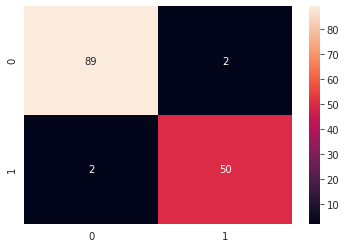

In [14]:
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k=10)
select_feature = select_feature.fit(X_train,y_train)
print('Score list:', select_feature.scores_)
print('Features list :', X_train.columns)

x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)

clf_2 = xgb.XGBClassifier()
clf_2 = clf_2.fit(x_train_2, y_train)

preds_2 = clf_2.predict(x_test_2)

print('Accuracy score =', accuracy_score(preds_2,y_test))

cm_2 = confusion_matrix(preds_2, y_test)
sns.heatmap(cm_2, annot=True, fmt='d')

Optimal features =  12
Best features =  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



[Text(0, 0.5, 'CV_Scores'), Text(0.5, 0, '# of selected features')]

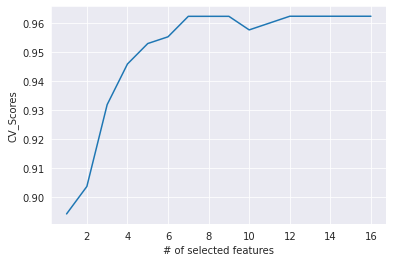

In [15]:
from sklearn.feature_selection import RFECV

clf_3=xgb.XGBClassifier()
rfecv = RFECV(estimator = clf_3, step=1, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

print('Optimal features = ', rfecv.n_features_)
print('Best features = ', X_train.columns[rfecv.support_])

print(classification_report(y_test, rfecv.predict(X_test)))

num_features=[i for i in range(1,len(rfecv.grid_scores_)+1)]
cv_scores=rfecv.grid_scores_
ax=sns.lineplot(x=num_features,y=cv_scores)
ax.set(xlabel='# of selected features',ylabel='CV_Scores')

Feature ranking:
1. feature 1 (0.269300)
2. feature 3 (0.166811)
3. feature 7 (0.146983)
4. feature 13 (0.140561)
5. feature 0 (0.048421)
6. feature 12 (0.039879)
7. feature 9 (0.038432)
8. feature 14 (0.036457)
9. feature 2 (0.022697)
10. feature 15 (0.016848)
11. feature 5 (0.016684)
12. feature 11 (0.015968)
13. feature 10 (0.012600)
14. feature 8 (0.010597)
15. feature 6 (0.009270)
16. feature 4 (0.008494)


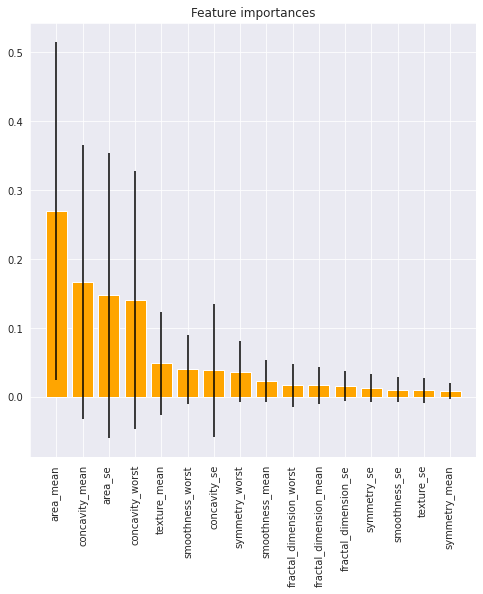

<Figure size 432x288 with 0 Axes>

In [28]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="orange", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


fig = plt.gcf()
fig.savefig('./imgs/imp.png', dpi=400)

Accuracy is:  0.9790209790209791


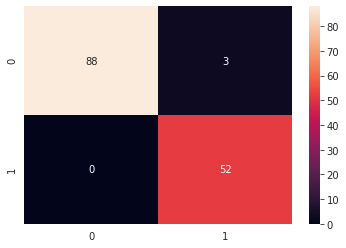

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=10)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test, clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")